In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import os

# Specify the directory path
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\New capacity'

# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]
file_names

newcap = pd.DataFrame()

for i in file_names:
    if '.csv' in str(i):
        df = pd.read_csv(i)
        df = df.dropna(axis=1, how='all')
        df = df.drop(columns=['NAME', 'SCENARIO','REGION'])
        newcap = pd.concat([newcap, df], axis =0)

techlist = newcap['TECHNOLOGY'].unique().tolist()
techlist

['BristaB1',
 'BristaB2',
 'CSBOHOB',
 'CSDEMAND',
 'DCACC',
 'DECFOHOB',
 'DHNCS',
 'DHNNV',
 'DHN',
 'ELGRIDDUM',
 'ELGRID',
 'HgldP3468',
 'HmrbySEWHP',
 'HslbyP1toP3',
 'IMPWASTE',
 'KVV1',
 'KVV8',
 'LSVTACHP',
 'MINBIOOIL',
 'MINFINBIOOIL',
 'MINLND',
 'MINSOLIDBIOP',
 'MINWASTE',
 'MINWOODCHIPS',
 'NVDEMAND',
 'S100',
 'S101',
 'S102',
 'S103',
 'S104',
 'S105',
 'S106',
 'S107',
 'S108',
 'S109',
 'S10',
 'S110',
 'S111',
 'S112',
 'S113',
 'S114',
 'S115',
 'S116',
 'S117',
 'S118',
 'S119',
 'S11',
 'S120',
 'S121',
 'S122',
 'S123',
 'S124',
 'S125',
 'S126',
 'S127',
 'S128',
 'S129',
 'S12',
 'S130',
 'S131',
 'S132',
 'S133',
 'S134',
 'S135',
 'S136',
 'S137',
 'S138',
 'S139',
 'S13',
 'S140',
 'S141',
 'S142',
 'S143',
 'S144',
 'S145',
 'S146',
 'S147',
 'S148',
 'S149',
 'S14',
 'S150',
 'S151',
 'S152',
 'S153',
 'S154',
 'S155',
 'S156',
 'S157',
 'S158',
 'S159',
 'S15',
 'S160',
 'S161',
 'S162',
 'S163',
 'S164',
 'S165',
 'S166',
 'S167',
 'S168',
 'S169',
 'S1

In [2]:
Sources = pd.read_excel('Combined_GIS_Results.xlsx')

sourcesnew = Sources.loc[Sources['Marker'].isin(techlist)]

sourcesnew.rename(columns={"Marker": "TECHNOLOGY"}, inplace=True)


df_merge = pd.read_csv('NewCapacity_LTLE.csv')


ACC_df = pd.DataFrame()

techlist = df_merge['TECHNOLOGY'].unique()
for i in techlist:
    dfint = df_merge[df_merge['TECHNOLOGY'] == str(i)].copy()
    corvallist = []
    vallist = dfint['VALUE'].to_list()
    oplife = 30
    yearlist = dfint['YEAR'].to_list()
    for y in dfint['YEAR']:
        sum = 0
        for i in range(0, len(vallist)):
            if int(y) - int(yearlist[i]) >=0 and int(y) - int(yearlist[i]) < oplife:
                sum = sum + vallist[i]
        corvallist.append(sum)
    dfint['VALUE'] = corvallist
    ACC_df = pd.concat([ACC_df, dfint], ignore_index=True, sort=False)
namelist = []
for i in range (0, len(ACC_df)):
    namelist.append('AccumulatedNewCapacity')
ACC_df['NAME'] = namelist
ACC_df_final = ACC_df.loc[ACC_df['YEAR'] == ACC_df['YEAR'].max()]
ACC_df_final = ACC_df_final.dropna(axis=1, how='all')
ACC_df_final = ACC_df_final.drop(['NAME', 'REGION', 'SCENARIO', 'YEAR'], axis=1)



In [3]:
df_merge = pd.merge(ACC_df_final, sourcesnew, on=['TECHNOLOGY'])
df_merge 

Datacenter_total = df_merge.loc[df_merge['Source type'] == 'Data center']
Ice_rink_total = df_merge.loc[df_merge['Source type'] == 'Ice rink']
subway_station_total = df_merge.loc[df_merge['Source type'] == 'subway station']
supermarket_total = df_merge.loc[df_merge['Source type'] == 'supermarket']
Datacenter = df_merge.loc[df_merge['Source type'] == 'Data center']
Ice_rink = df_merge.loc[df_merge['Source type'] == 'Ice rink']
subway_station = df_merge.loc[df_merge['Source type'] == 'subway station']
supermarket = df_merge.loc[df_merge['Source type'] == 'supermarket']

In [4]:
df_merge.rename(columns={"VALUE": "Installed capacity"}, inplace=True)
df_merge['Ratio'] = df_merge['Installed capacity']/df_merge['Capacity']
df_merge = df_merge.loc[df_merge['Ratio']!= 0]
df_merge['Length'] = df_merge['Length']/1000

Datacenter = df_merge.loc[df_merge['Source type'] == 'Data center']
Ice_rink = df_merge.loc[df_merge['Source type'] == 'Ice rink']
subway_station = df_merge.loc[df_merge['Source type'] == 'subway station']
supermarket = df_merge.loc[df_merge['Source type'] == 'supermarket']

In [5]:
print(str('Supermarket' + ' ' +  str(len(supermarket))))
print(str('Ice_rink' + ' ' +   str(len(Ice_rink))))
print(str('subway_station' + ' ' +   str(len(subway_station))))
print(str('Datacenter' + ' ' +   str(len(Datacenter))))

print(str('Supermarket_total' + ' ' +  str(len(supermarket_total))))
print(str('Ice_rink_total' + ' ' +   str(len(Ice_rink_total))))
print(str('subway_station_total' + ' ' +   str(len(subway_station_total))))
print(str('Datacenter_total' + ' ' +   str(len(Datacenter_total))))


Supermarket 145
Ice_rink 8
subway_station 31
Datacenter 28
Supermarket_total 201
Ice_rink_total 14
subway_station_total 63
Datacenter_total 28


In [6]:
shortdistance = df_merge[(df_merge['Length'] <= 2)]
mediumdistance = df_merge[(df_merge['Length'] >=2.01) & (df_merge['Length'] <=4)]
thodalongerdistance = df_merge[(df_merge['Length'] >=4.01) & (df_merge['Length'] <=6)]
thodaaurlongerdistance = df_merge[(df_merge['Length'] >=6.01) & (df_merge['Length'] <=8)]
bahutlongerdistance = df_merge[(df_merge['Length'] >=8.01)]
mediumdistance

,Installed capacity,TECHNOLOGY,Name,Cost,Losses,Length,Total_Cost,Annual heat (GWh),Capacity,Capcost,Source type,Ratio
0,0.186567,S100,Coop Konsum Gubbängen,4360.151268,132.529787,2.01904,10574997.90,1.634329,0.186567,43601.512681,supermarket,1.0
4,0.373134,S104,Hemköp Stockholm City,2756.360697,167.264962,2.44015,16455891.22,3.268658,0.373134,27563.606969,supermarket,1.0
9,0.186567,S108,Coop Brommaplan,4747.729506,222.016142,3.38233,17715415.56,1.634329,0.186567,47477.295057,supermarket,1.0
22,0.186567,S119,Coop Konsum Hammarbyhöden,4410.889635,216.577868,3.29948,17281477.37,1.634329,0.186567,44108.896347,supermarket,1.0
27,0.373134,S123,Willys S:t Eriksgatan,4262.680211,161.670843,2.35854,15905529.42,3.268658,0.373134,42626.802106,supermarket,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
290,0.186567,S84,Coop Fruängen,2461.115179,149.614566,2.27932,11938249.96,1.634329,0.186567,24611.151791,supermarket,1.0
292,0.186567,S86,ICA Bredäng,2689.399341,251.526573,3.83191,20070152.22,1.634329,0.186567,26893.993414,supermarket,1.0
293,0.186567,S87,Hemköp Bredäng,2710.812573,253.529250,3.86242,20229952.52,1.634329,0.186567,27108.125732,supermarket,1.0
294,0.093284,S88,Coop Nära Östberga,5168.285678,133.914711,2.16708,8195978.64,0.817164,0.093284,51682.856776,supermarket,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


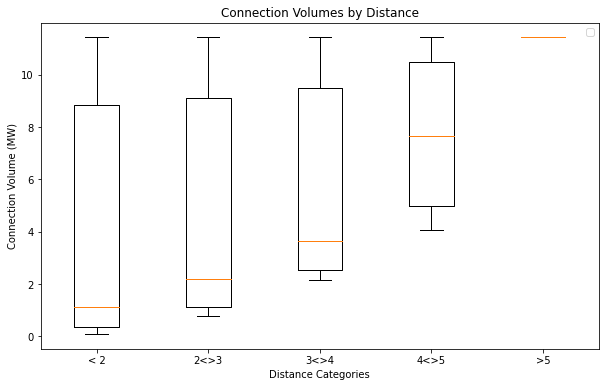

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the extracted table
categories = ['< 2', '2<>3', '3<>4', '4<>5', '>5']
max_connection_volume = [11.42, 11.42, 11.42, 11.42, 11.42]
min_connection_volume = [0.09, 0.76, 2.16, 4.08, 11.42]
mean_connection_volume = [1.13, 2.18, 3.63, 7.67, 11.42]

# Prepare data for the box plot (simulated)
data = []

# Simulate data around the min, mean, and max
for min_val, mean_val, max_val in zip(min_connection_volume, mean_connection_volume, max_connection_volume):
    # Simulate some random values: 10 values around min, mean, and max
    data.append([min_val] * 3 + [mean_val] * 4 + [max_val] * 3)

# Create a box plot
plt.figure(figsize=(10, 6))
box = plt.boxplot(data, positions=np.arange(len(categories)), widths=0.4)


# Adding labels and title
plt.title('Connection Volumes by Distance')
plt.xlabel('Distance Categories')
plt.ylabel('Connection Volume (MW)')
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.legend()  # Show legend

plt.savefig('distance_vs_capacity.png', format='png', dpi=800)

# Show the plot
plt.show()


In [9]:
supermarket = pd.read_excel('selectedsources.xlsx', sheet_name='Supermarket')
Data_center = pd.read_excel('selectedsources.xlsx', sheet_name='Data center')
Ice_rink = pd.read_excel('selectedsources.xlsx', sheet_name='Ice rink')
Sewage_treatment = pd.read_excel('selectedsources.xlsx', sheet_name='Sewage treatment')
Subway_station = pd.read_excel('selectedsources.xlsx', sheet_name='Subway station')

finaldf =pd.DataFrame()
finaldf['Source Type'] = ['Supermarket', 'Data center', 'Ice rink', 'Sewage treatment', 'Subway station']
finaldf['Mean'] = [supermarket['Length'].mean(), Data_center['Length'].mean(), Ice_rink['Length'].mean(), Sewage_treatment['Length'].mean(), Subway_station['Length'].mean()]
finaldf['Maximum'] = [supermarket['Length'].max(), Data_center['Length'].max(), Ice_rink['Length'].max(), Sewage_treatment['Length'].max(), Subway_station['Length'].max()]
finaldf['Minimum'] = [supermarket['Length'].min(), Data_center['Length'].min(), Ice_rink['Length'].min(), Sewage_treatment['Length'].min(), Subway_station['Length'].min()]
finaldf


,Source Type,Mean,Maximum,Minimum
0,Supermarket,2.743883,6.85953,0.04519
1,Data center,4.443860,8.13714,0.11496
2,Ice rink,3.637815,7.15929,0.74266
3,Sewage treatment,4.376605,4.98051,3.77270
4,Subway station,2.446663,6.99688,0.14458


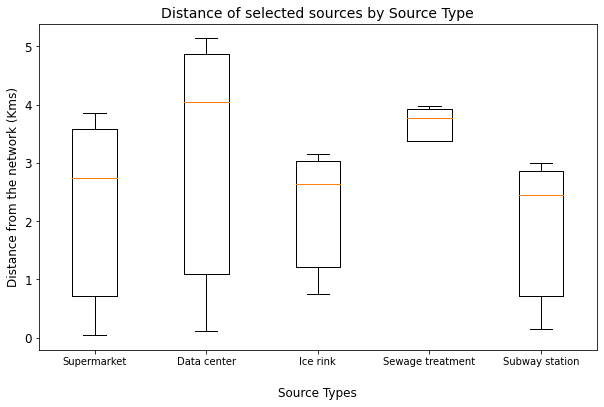

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
source_types = ['Supermarket', 'Data center', 'Ice rink', 'Sewage treatment', 'Subway station']
mean_values = [2.743883, 4.051003, 2.637815, 3.376605, 2.446663]
max_values = [3.85953, 5.13714, 3.15929, 3.98051, 2.99688]
min_values = [0.04519, 0.11496, 0.74266, 3.77270, 0.14458]

# Simulate data based on min, mean, and max
data = []
for min_val, mean_val, max_val in zip(min_values, mean_values, max_values):
    # Create simulated data around min, mean, and max
    data.append([min_val] * 3 + [mean_val] * 4 + [max_val] * 3)

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, positions=np.arange(len(source_types)), widths=0.4)

# Add labels and title
plt.title('Distance of selected sources by Source Type', fontsize=14)
plt.xlabel('Source Types', fontsize=12, labelpad=20)
plt.ylabel('Distance from the network (Kms)', fontsize=12)
plt.xticks(ticks=np.arange(len(source_types)), labels=source_types)
plt.tick_params(axis='y', labelsize=12)  # Adjust the labelsize as needed

# Save the plot
plt.savefig('source_type_distance.png', format='png', dpi=800)

# Show the plot
plt.show()


Supermarket 145
Ice_rink 8
subway_station 31
Datacenter 28
Supermarket_total 201
Ice_rink_total 14
subway_station_total 63
Datacenter_total 28


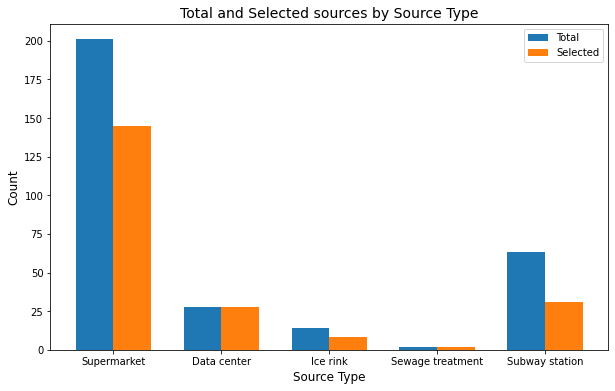

In [11]:
print(str('Supermarket' + ' ' +  str(len(supermarket))))
print(str('Ice_rink' + ' ' +   str(len(Ice_rink))))
print(str('subway_station' + ' ' +   str(len(subway_station))))
print(str('Datacenter' + ' ' +   str(len(Datacenter))))

print(str('Supermarket_total' + ' ' +  str(len(supermarket_total))))
print(str('Ice_rink_total' + ' ' +   str(len(Ice_rink_total))))
print(str('subway_station_total' + ' ' +   str(len(subway_station_total))))
print(str('Datacenter_total' + ' ' +   str(len(Datacenter_total))))


finaldf1 =pd.DataFrame()
finaldf1['Source Type'] = ['Supermarket', 'Data center', 'Ice rink', 'Sewage treatment', 'Subway station']
finaldf1['Total'] = [len(supermarket_total), len(Datacenter_total), len(Ice_rink_total), 2, len(subway_station_total)]
finaldf1['Selected'] = [len(supermarket), len(Datacenter), len(Ice_rink), 2, len(subway_station)]

import matplotlib.pyplot as plt
import numpy as np

# Data from the table
source_types = ['Supermarket', 'Data center', 'Ice rink', 'Sewage treatment', 'Subway station']
total_counts = finaldf1['Total']
selected_counts = finaldf1['Selected']

# Define the position of the bars on the x-axis
x = np.arange(len(source_types))

# Width of the bars
bar_width = 0.35

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, total_counts, bar_width, label='Total')
plt.bar(x + bar_width/2, selected_counts, bar_width, label='Selected')

# Add labels and title
plt.title('Total and Selected sources by Source Type', fontsize=14)
plt.xlabel('Source Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=x, labels=source_types)

# Add legend
plt.legend()
plt.savefig('source_type_selection.png', format='png', dpi=800)

In [12]:
finaldf2 =pd.DataFrame()
finaldf2['Source Type'] = ['Supermarket', 'Data center', 'Ice rink', 'Sewage treatment', 'Subway station']
finaldf2['Total'] = [supermarket_total['Capacity'].sum(), Datacenter_total['Capacity'].sum(), Ice_rink_total['Capacity'].sum(), 4.11,  subway_station_total['Capacity'].sum()]
finaldf2['Selected'] = [supermarket['Capacity'].sum(), Datacenter['Capacity'].sum(), Ice_rink['Capacity'].sum(), 4.11, subway_station['Capacity'].sum()]
finaldf2 = finaldf2.round(2)
finaldf2

,Source Type,Total,Selected
0,Supermarket,36.85,28.08
1,Data center,319.63,319.63
2,Ice rink,2.08,1.19
3,Sewage treatment,4.11,4.11
4,Subway station,7.91,3.89


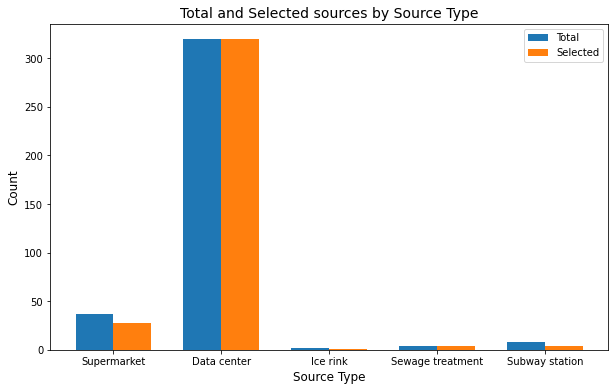

In [13]:
# Data from the table
source_types = ['Supermarket', 'Data center', 'Ice rink', 'Sewage treatment', 'Subway station']
total_counts = finaldf2['Total']
selected_counts = finaldf2['Selected']

# Define the position of the bars on the x-axis
x = np.arange(len(source_types))

# Width of the bars
bar_width = 0.35

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, total_counts, bar_width, label='Total')
plt.bar(x + bar_width/2, selected_counts, bar_width, label='Selected')

# Add labels and title
plt.title('Total and Selected sources by Source Type', fontsize=14)
plt.xlabel('Source Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=x, labels=source_types)

# Add legend
plt.legend()
plt.savefig('source_type_capacity.png', format='png', dpi=800)

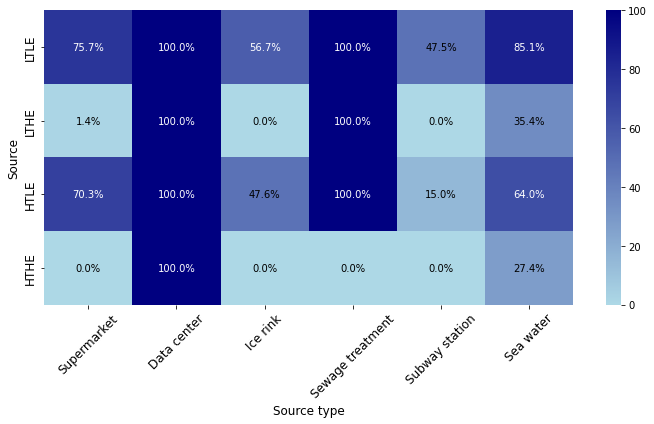

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Data from the table
data = {
    'Source': ['Supermarket', 'Data center', 'Ice rink', 'Sewage treatment', 'Subway station', 'Sea water'],
    'LTLE': [28, 319.6, 1.19, 4.1, 3.8, 766],
    'LTHE': [0.5, 319.6, 0, 4.1, 0, 319],
    'HTLE': [26, 319.6, 1, 4.1, 1.2, 576],
    'HTHE': [0, 319.6, 0, 0, 0, 247],
    'Total Capacity (MW)': [37, 319.6, 2.1, 4.1, 8, 900]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Calculate potential achieved by dividing each column by the total capacity
df['LTLE_potential'] = df['LTLE'] / df['Total Capacity (MW)'] * 100
df['LTHE_potential'] = df['LTHE'] / df['Total Capacity (MW)'] * 100
df['HTLE_potential'] = df['HTLE'] / df['Total Capacity (MW)'] * 100
df['HTHE_potential'] = df['HTHE'] / df['Total Capacity (MW)'] * 100

# Extract only the potential achieved columns for the heat map
df_potential = df[['LTLE_potential', 'LTHE_potential', 'HTLE_potential', 'HTHE_potential']]
df_potential.index = df['Source']

df_potential.rename(columns={
    'LTLE_potential': 'LTLE',
    'LTHE_potential': 'LTHE',
    'HTLE_potential': 'HTLE',
    'HTHE_potential': 'HTHE'
}, inplace=True)

# Create a custom colormap that starts with light blue and ends with royal navy blue
colors = ["#add8e6", "#000080"]  # Light blue to royal navy blue
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", colors)

# Create a stacked heat map without annotations
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_potential.T,
                       cmap=custom_cmap, cbar=True, linewidths=0, linecolor='white')

# Manually annotate percentages, adjusting the coordinates
for i in range(df_potential.shape[0]):  # Loop through columns (types)
    for j in range(df_potential.shape[1]):  # Loop through rows (sources)
        # Adjust text color based on background color
        text_color = 'black' if df_potential.iloc[i, j] < 50 else 'white'
        heatmap.text(i + 0.5, j + 0.5, f"{df_potential.iloc[i, j]:.1f}%", 
                     ha='center', va='center', color=text_color)

# Customize the plot
plt.xlabel('Source type', fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
